# Machine Learning with scikit-learn

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


The dataset to be used in this webinar is a CSV file named telco.csv, which contains data on telecom customers churning and some of their key behaviors. It contains the following columns: <br>

#### Features: 

- customerID: Unique identifier of a customer. <br>
- gender: Gender of customer. <br>
- SeniorCitizen: Binary variable indicating if customer is senior citizen. <br>
- Partner: Binary variable if customer has a partner. <br>
- Dependents: Binary variable if customer has dependent. <br>
- tenure: Number of weeks as a customer. <br>
- PhoneService: Whether customer has phone service. <br>
- MultipleLines: Whether customer has multiple lines. <br>
- InternetService: What type of internet service customer has ("DSL", "Fiber optic", "No"). <br>
- OnlineSecurity: Whether customer has online security service. <br>
- OnlineBackup: Whether customer has online backup service. <br>
- DeviceProtection: Whether customer has device protection service. <br>
- TechSupport: Whether customer has tech support service. <br>
- StreamingTV: Whether customer has TV streaming service. <br>
- StreamingMovies: Whether customer has movies streaming service. <br>
- Contract: Customer Contract Type ('Month-to-month', 'One year', 'Two year'). <br>
- PaperlessBilling: Whether paperless billing is enabled. <br>
- PaymentMethod: Payment method. <br>
- MonthlyCharges: Amount of monthly charges in $. <br>
- TotalCharges: Amount of total charges so far. <br>

#### Target Variable: <br>

Churn: Whether customer 'Stayed' or 'Churned'. <br>

The data is loaded from the link with index column defined as Unnnamed

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/datacamp/machine-learning-with-scikit-learn-live-training/master/data/telco_churn.csv', index_col = "Unnamed: 0")

## DATA EXPLORATION:

In [4]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,Stayed
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,Stayed
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Churned
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,Stayed
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Churned


There are some variables which look like categorical variables like SeniorCitizen, Partner, Dependents etc. And CustomerID is a unique ID assigned to each customer which is not a good predictor therefore will be dropped.

In [5]:
data = data.drop('customerID', axis=1)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   object 
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


There are 7043 records of subscribers which contain all the details.

In [7]:
data.nunique()

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        4
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

There are a lot of variables which are categorical and they must be encoded into dummy variables using OneHot Encoding. <br>
The InternetService variable has 4 categories but according to the feature description it should have three.

In [8]:
data.InternetService.unique()

array(['DSL', 'Fiber optic', 'No', 'dsl'], dtype=object)

In [9]:
data.InternetService = data.InternetService.replace({'dsl':'DSL'})
data.InternetService.unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

Now the categorical variables are checked, proceeding towards encoding into dummy variables.

In [10]:
data.nunique()

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [11]:
data.TotalCharges = pd.to_numeric(data.TotalCharges, errors='coerce')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   object 
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


TotalCharges column has 11 missing variables which should be either dropped or filled by mean or median values.

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

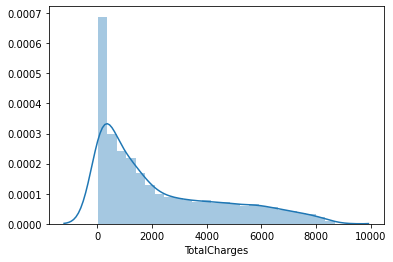

In [12]:
sns.distplot(data.TotalCharges)
data.TotalCharges.describe()

In [13]:
data.TotalCharges.fillna(data.TotalCharges.median(), inplace=True)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   object 
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


The dataset is to be pre-processed for categorical and continious variables.

In [15]:
features = [column_name for column_name in data.columns if column_name !='Churn']

categorical = [column_name for column_name in features if data[column_name].dtype == 'object']

continious = [column_name for column_name in features if data[column_name].dtype != 'object']

Checking the lists of variables to make sure the operations were correct

In [16]:
print('Categorical variables are', categorical)
print ('Continious variables are', continious)

Categorical variables are ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
Continious variables are ['tenure', 'MonthlyCharges', 'TotalCharges']


Visualizing target variable relationship with features

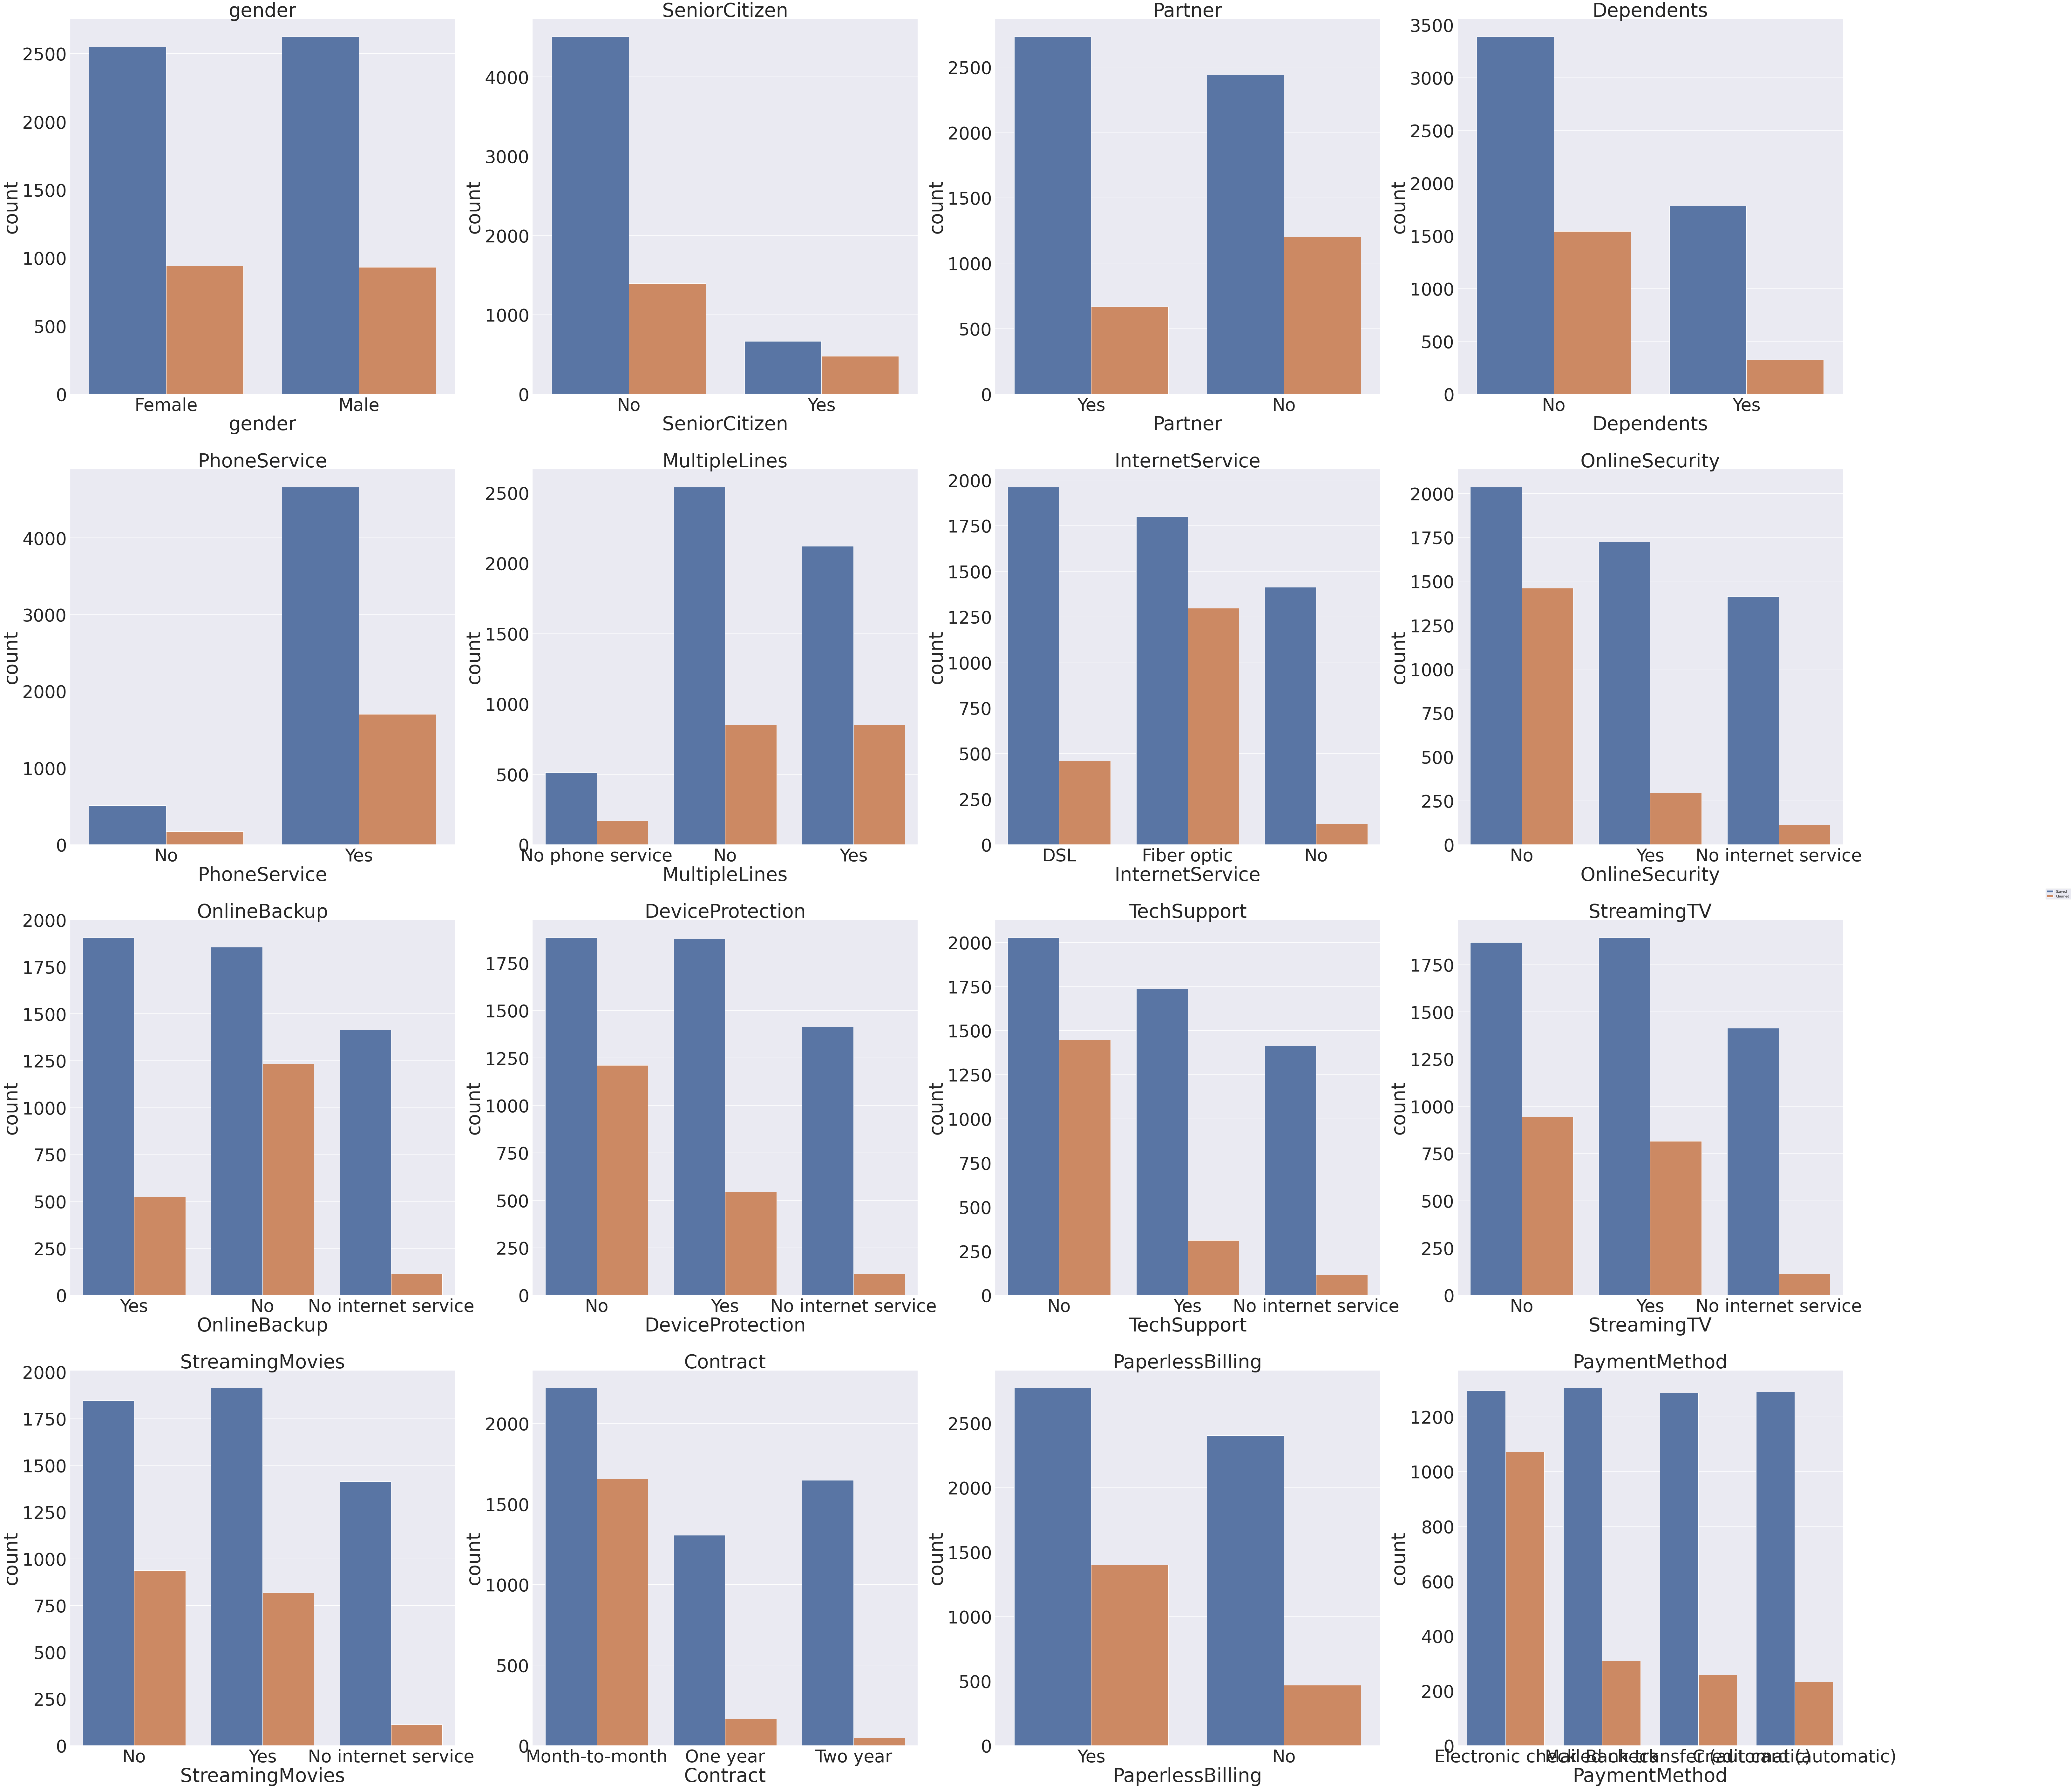

In [17]:
# Setting aesthetics for better viewing
plt.rcParams["axes.labelsize"] = 5
sns.set(font_scale=5)

fig, axes = plt.subplots(4, 4, figsize = (100, 100))

for ax, column in zip(axes.flatten(), categorical):
    
    # Create countplot
    sns.countplot(x = column, hue =  'Churn', data = data, ax = ax)
    
    # Set the title of each subplott
    ax.set_title(column)

    # Improve legends
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc='right', fontsize = 10)
    ax.get_legend().remove()

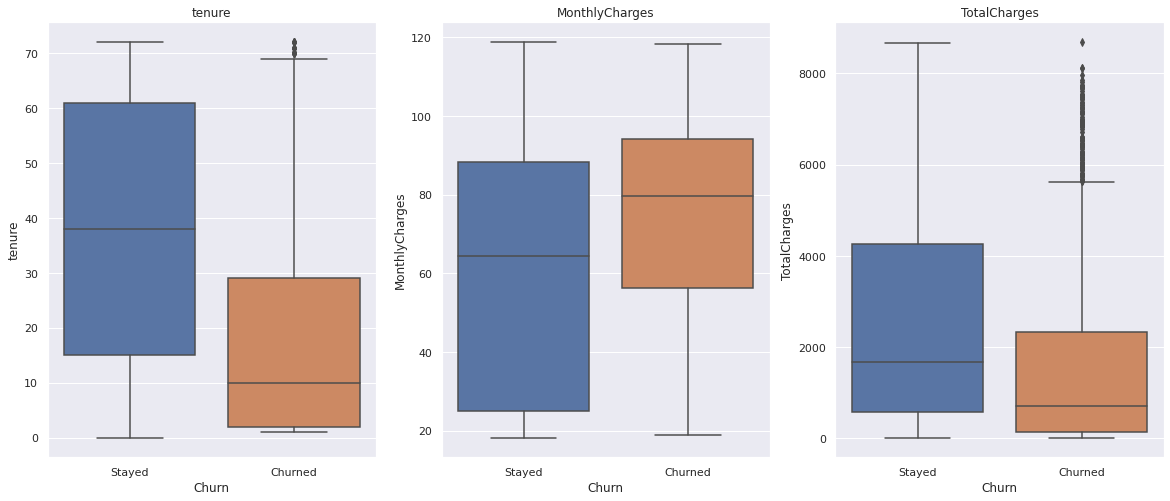

In [18]:
# Setting aesthetics for better viewing
plt.rcParams["axes.labelsize"] = 1
sns.set(font_scale=1) 
 
# Create figure and axes
fig, axes = plt.subplots(1, 3, figsize = (20, 8))

# Iterate over each axes, and plot a boxplot with numeric columns
for ax, column in zip(axes.flatten(), continious):
    
    # Create a boxplot
    sns.boxplot(x = "Churn", y = column, data = data, ax = ax)
    
    # Set title
    ax.set_title(column)

Observations based on the above visualizations


1.   There seems to be no difference in churn rate in both the genders
2.   There is high churn rate for senior citizens, fiber internet users and non users of online security.
3. Higher total charges also impact the churn rate.



## DATA PREPROCESSING

In [19]:
# Split data between X and label
X = data[features]
y= data['Churn'].replace({'Stayed':0,'Churned':1})

In [20]:
#Train and test split
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X,y, test_size = 0.4, random_state=888)

In [21]:
#Scaling data
from sklearn.preprocessing import StandardScaler

#Scaler initialization and fit
scaler = StandardScaler()
scaler.fit(train_X[continious])

#Scalar transformation
train_cont_transform = scaler.transform(train_X[continious])
test_cont_transform = scaler.transform(test_X[continious])

#Replacing transformed values in the train and test dataset
train_X[continious] = train_cont_transform
test_X[continious] = test_cont_transform

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

One Hot Encoding to transform categorical variables in to dummy variables

In [22]:
train_X = pd.get_dummies(train_X, columns = categorical,  drop_first = True)
test_X = pd.get_dummies(test_X, columns = categorical,  drop_first = True)

## Modeling

### 1. NULL ACCURACY
The NULL accuracy is the baseline accuracy of any model if it predicts all samples with one prediction

In [23]:
print (data.Churn.value_counts()/data.shape[0])

print(np.sum(test_y) / np.shape(test_y))
print(np.sum(train_y) / np.shape(train_y))

Stayed     0.73463
Churned    0.26537
Name: Churn, dtype: float64
[0.26650106]
[0.26461538]


The NULL accuracy for this model is **73.463%**, i.e. any model with less than this accuracy is a useless model.

### 1. K-Neighbours Classifier

In [24]:
#Importing packages
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import  accuracy_score

#Hyperparameter Tuning for KNN Classifier
errors = []

for i in range(1,40):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(train_X, train_y)
  pred_test_y = knn.predict(test_X)
  errors.append(np.mean(pred_test_y != test_y))

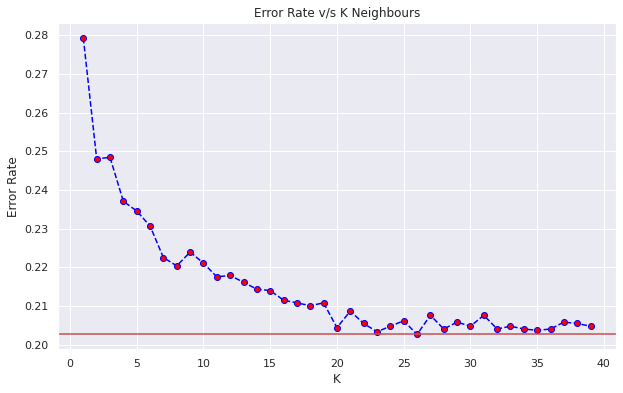

In [25]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40), errors, color = 'blue', linestyle = 'dashed', marker = 'o', markerfacecolor = 'red')
plt.axhline(y=min(errors), color='r', linestyle='-')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.title('Error Rate v/s K Neighbours')
plt.show()

**Based on the above chart, number of neighbors for the KNN Classifier will be set as 32**

In [26]:
#Initializing classifier
knn = KNeighborsClassifier( n_neighbors= 26)

#Fitting on train data
knn.fit(train_X, train_y)

#Predictions
pred_train_y = knn.predict(train_X)
pred_test_y = knn.predict(test_X)

#Accuracy scores
print('Accuracy of Training Dataset is', accuracy_score(train_y, pred_train_y))
print ('Accuracy of Test Dataset is', accuracy_score(test_y, pred_test_y))

Accuracy of Training Dataset is 0.8108875739644971
Accuracy of Test Dataset is 0.7973740241305891


### 2. Random Forests Classifier

In [27]:
#Importing the LIbraries
from sklearn.ensemble import RandomForestClassifier

#initializing the model
rand = RandomForestClassifier(n_estimators = 300,  random_state=888)

#Fitting the model
rand.fit(train_X, train_y)

#Prediction
pred_rfc_train_y = rand.predict(train_X)
pred_rfc_test_y = rand.predict(test_X)

#Accuracy scores
print('Accuracy of Training Dataset is', accuracy_score(train_y, pred_rfc_train_y))
print ('Accuracy of Test Dataset is', accuracy_score(test_y, pred_rfc_test_y))

Accuracy of Training Dataset is 0.9976331360946745
Accuracy of Test Dataset is 0.7952448545067423


The model above has a near perfect accuracy for the training data set but only a 80% accuracy for the test dataset. This indicates there is overfitting of the data on the training set.

In [28]:
#Importing Cross Validation
from sklearn.model_selection import cross_val_score

#Initializing Cross Validation object
cvs = cross_val_score(rand, train_X, train_y, cv=10)

print(cvs)
print('\n Mean Cross Val Score for Random Forest Classifier is', round(np.mean(cvs),4))

[0.77068558 0.78959811 0.79432624 0.79905437 0.77304965 0.76303318
 0.81279621 0.78909953 0.77962085 0.79146919]

 Mean Cross Val Score for Random Forest Classifier is 0.7863


#### Hyperparameter Tuning for Random Forest Classifier


In [29]:
rand.get_params

<bound method BaseEstimator.get_params of RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=888,
                       verbose=0, warm_start=False)>

The parameters that can be tuned for this model will be chosen from the output above. In general for this classifier the most commonly used prameters are n_estimators, max_depth, max_features and min_samples_leaf.

In [36]:
n_estimators = np.arange(100,400,200)
max_depth = np.arange(4,12,4)
min_samples_split = np.arange(10,60,20)
min_samples_leaf = np.arange(4,16,4)
max_features = np.arange(5,15,5)

In [37]:
params = dict(n_estimators = n_estimators, max_depth = max_depth, max_features = max_features)

params

{'max_depth': array([4, 8]),
 'max_features': array([ 5, 10]),
 'n_estimators': array([100, 300])}

In [38]:
#Importing Libraries
from sklearn.model_selection import GridSearchCV

#Initializing Grid Search CV
clf = GridSearchCV(rand, params)

#Fitting the model with best parameters
clf.fit(train_X, train_y)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=300, n_jobs=None,
                                              oob_score=False, random_state=888,
                              

In [39]:
best_params = clf.best_params_
print (best_params)

best_result = clf.best_score_
print(best_result)

opt_pred_y= clf.predict(test_X)
print('Accuracy for the test set is ', accuracy_score(opt_pred_y, test_y))

{'max_depth': 8, 'max_features': 10, 'n_estimators': 100}
0.8004733727810651
Accuracy for the test set is  0.8080198722498225


**Grid Search provided the optimal parameters but the incremental increase in the performance of the model was not too high. I was finally able to break the 80% barrier challenge**

### 3. XGB Classifier

In [35]:
#Importing the classifier
from xgboost import XGBClassifier

xgb = XGBClassifier()

xgb.fit(train_X, train_y)

xgb_pred_y = xgb.predict(test_X)

print ('Accuracy score for XGB Classifier is', accuracy_score(xgb_pred_y, test_y))

Accuracy score for XGB Classifier is 0.8030518097941802
